Bz
EKL
Epsilon
Rectifier
Pressure
Vasyliunas
Density
Velocity
WAV
Bz
EKL
Epsilon
Rectifier
Pressure
Vasyliunas
Density
Velocity
WAV


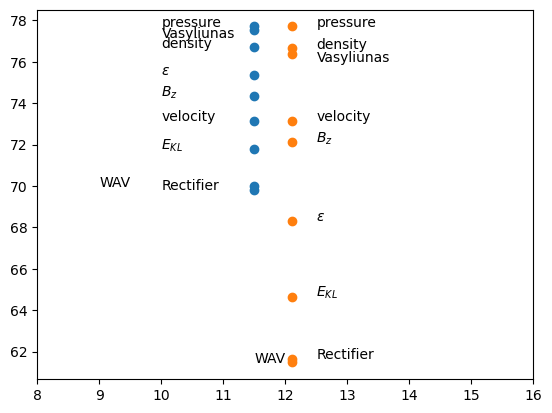

In [39]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


def cusp(name, v = np.nan, n = np.nan, p = np.nan, B = np.nan, Bz = np.nan,  Bt = np.nan, Bs = np.nan, theta_c = np.nan):
    '''
    Implement the cusp-solar wind functions described in Newell et al. 2006 (Table 1), 
    to predict the cusp latitude

    Keywords:
        v: sw velocity [km/s]
        n: density [cm-3]
        p: dynamic pressure [nPa]
        B, Bz, Bt, Bs: velocity [nT]
        theta_c: solar wind clock angle (radians)

    Keys (the data in table 1), note only 'sw_func', 'S', and 'I' are used?: 
        'sw_func': the solar wind coupling function
        'ECB': Equatorward Cusp Boundary
        'PCB': Poleward Cusp Boundary
        'CEB': Corrected Equatorward Boundary
        'CW': Cusp Width
        'S': Slope
        'I': Intercept

    Returns Intercept + slope * solar wind coupling function, for model with a given name ('Bz', 'EKL', etc.)

    possible input names: 'Bz', 'EKL', 'Epsilon', 'Rectifier', 'Pressure', 'Vasyliunas', 'Density', 'Velocity', 'WAV'
    Example: theta = cusp('Bz', Bz = -10.)
    '''
    funcs = {'Bz':  {'sw_func': Bz,'ECB':0.63, 'PCB':0.65, 'CEB':0.65, 'CW':0.12, 'S':0.45, 'I':76.6 }, \
             'EKL': {'sw_func': v*Bt*(np.sin(theta_c/2))**2,'ECB':-0.76, 'PCB':-0.74, 'CEB': -0.78, 'CW': 0.08, 'S': -1.9e-3, 'I': 78.9 }, \
             'Epsilon': {'sw_func': v*B**2*(np.sin(theta_c/2))**4,'ECB':-0.70, 'PCB':-0.68, 'CEB':-0.71, 'CW':0.05, 'S':-1.25e-4, 'I':77.7 }, \
             'Rectifier': {'sw_func': v*Bs,'ECB':0.76, 'PCB':0.76, 'CEB':0.77, 'CW':0.04, 'S':2.18e-3, 'I':78.0 }, \
             'Pressure': {'sw_func': p,'ECB':-0.28, 'PCB':-0.21, 'CEB':-0.27, 'CW':0.31, 'S':-0.321, 'I':77.7 }, \
             'Vasyliunas': {'sw_func': p**(1./6)*v**(4./3)*Bt*(np.sin(theta_c/2))**4,'ECB':-0.78, 'PCB':-0.77, 'CEB':-0.79, 'CW':0.03, 'S':-2.14e-4, 'I':78.3 }, \
             'Density': {'sw_func': n,'ECB':-0.06, 'PCB':0.01, 'CEB':-0.04, 'CW':0.29, 'S':-1.38e-2, 'I':76.7 }, \
             'Velocity': {'sw_func': v,'ECB':-0.31, 'PCB':-0.31, 'CEB':-0.32, 'CW':-0.01, 'S':-1.02e-2, 'I':80.8 }, \
             'WAV': {'sw_func': v*Bt*(np.sin(theta_c/2))**4,'ECB':-0.79 , 'PCB':-0.78, 'CEB':-0.81, 'CW':0.01, 'S':-2.27e-3, 'I':78.5 } }
    return funcs[name]['I'] + funcs[name]['S'] * funcs[name]['sw_func']


names =  ['Bz', 'EKL', 'Epsilon', 'Rectifier', 'Pressure', 'Vasyliunas', 'Density', 'Velocity', 'WAV']
plot_names =  [r'$B_z$', r'$E_{KL}$', r'$\epsilon$', 'Rectifier', 'pressure', 'Vasyliunas', 'density', 'velocity', 'WAV']

fig, ax = plt.subplots()

# 'Control'
v = 750.
nn = 1.
p = 1.67e-27 * (nn * 1e6) * (v * 1e3) * 1e9
B = 5.
Bz = -5
Bt = 5.
Bs = np.min([0., Bz])
theta_c = np.pi
for n, pn in zip(names, plot_names):
    print(n)
    c = cusp(n, v = v, n = nn, p = p, B = B, Bz = Bz, Bt = Bt, Bs = Bs, theta_c = theta_c)
    ax.scatter(11.5, c, color = 'tab:blue')
    if n=='Vasyliunas':
        xoffset = 0
        yoffset = -0.4
    elif n=='WAV':
        xoffset = -1
        yoffset = 0
    else:
        xoffset=0; yoffset =0
    ax.annotate(pn, (10+xoffset, c+yoffset))

# 'Pulse'
v = 750.
nn = 4.
p = 1.67e-27 * (nn * 1e6) * (v * 1e3) * 1e9
B = 10.
Bz = -10
Bt = 10.
Bs = np.min([0., Bz])
theta_c = np.pi


for n, pn in zip(names, plot_names):
    print(n)
    c = cusp(n, v = v, n = nn, p = p, B = B, Bz = Bz, Bt = Bt, Bs = Bs, theta_c = theta_c)
    ax.scatter(12.1, c, color = 'tab:orange')
    if n=='Vasyliunas':
        xoffset = 0
        yoffset = -0.4
    elif n=='WAV':
        xoffset = -1
        yoffset = 0
    else:
        xoffset=0; yoffset =0
    ax.annotate(pn, (12.5+xoffset, c+yoffset))

ax.set_xlim([8,16])
plt.show()

nan
